Import libraries and upload data from nflverse github

In [1]:
#Import Pandas
import pandas as pd

#Import requests
import requests

#Import beautifulsoup
from bs4 import BeautifulSoup

#Import nummpy
import numpy as np

# Import vis libraris
import matplotlib.pyplot as plt
import seaborn as sns


/Users/jonathan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


All data used in this notebook is from Pro-football-reference.com

In [2]:
# List of URLs you want to scrape
urls = [
    'https://www.pro-football-reference.com/years/2024/games.htm',
    'https://www.pro-football-reference.com/years/2023/games.htm',
    'https://www.pro-football-reference.com/years/2022/games.htm',
    'https://www.pro-football-reference.com/years/2021/games.htm',
    'https://www.pro-football-reference.com/years/2020/games.htm',
    'https://www.pro-football-reference.com/years/2019/games.htm',
    'https://www.pro-football-reference.com/years/2018/games.htm',
    'https://www.pro-football-reference.com/years/2017/games.htm'
]

# Function to scrape data from a single URL and return a DataFrame
def scrape_games_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the main games table
    table = soup.find('table', id='games')

    # Initialize a list to store data
    data = []

    # Extract data from table rows
    for row in table.find_all('tr')[1:]:  # Skip header row
        cols = row.find_all(['th', 'td'])
        if len(cols) > 0:
            week = cols[0].text.strip()
            day = cols[1].text.strip()
            date = cols[2].text.strip()
            time = cols[3].text.strip()
            winner = cols[4].text.strip()
            awaygame = cols[5].text.strip()
            loser = cols[6].text.strip()
            pts_w = cols[8].text.strip()
            pts_l = cols[9].text.strip()
            yds_w = cols[10].text.strip()
            to_w = cols[11].text.strip()
            yds_l = cols[12].text.strip()
            to_l = cols[13].text.strip()

            data.append([week, day, date, time, winner, awaygame, loser, pts_w, pts_l, yds_w, to_w, yds_l, to_l])

    # Create DataFrame
    games_df = pd.DataFrame(data, columns=['Week', 'Day', 'Date', 'Time', 'Winner', 'Awaygame', 'Loser', 
                                           'PtsW', 'PtsL', 'YdsW', 'TOW', 'YdsL', 'TOL'])
    return games_df

# List to store DataFrames
all_games_data = []

# Loop over the URLs and scrape data
for url in urls:
    df = scrape_games_data(url)
    all_games_data.append(df)

# Optionally, concatenate all the DataFrames into one large DataFrame
combined_games_data = pd.concat(all_games_data, ignore_index=True)

# Print the first few rows of the combined DataFrame
print(combined_games_data.head())
print(combined_games_data.info())
print(combined_games_data.shape)

  Week  Day        Date    Time               Winner Awaygame  \
0    1  Thu  2024-09-05  8:20PM   Kansas City Chiefs            
1    1  Fri  2024-09-06  8:15PM  Philadelphia Eagles            
2    1  Sun  2024-09-08  1:00PM  Pittsburgh Steelers        @   
3    1  Sun  2024-09-08  1:00PM        Buffalo Bills            
4    1  Sun  2024-09-08  1:00PM   New Orleans Saints            

               Loser PtsW PtsL YdsW TOW YdsL TOL  
0   Baltimore Ravens   27   20  353   1  452   1  
1  Green Bay Packers   34   29  410   3  414   1  
2    Atlanta Falcons   18   10  270   0  226   3  
3  Arizona Cardinals   34   28  352   1  270   1  
4  Carolina Panthers   47   10  379   1  193   3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Week      2349 non-null   object
 1   Day       2349 non-null   object
 2   Date      2349 non-null   object
 3   T

In [3]:
#Data describe
print(combined_games_data.describe())

        Week   Day  Date    Time      Winner Awaygame      Loser  PtsW  PtsL  \
count   2349  2349  2349    2349        2349     2349       2349  2349  2349   
unique    24     9   478      34          37        3         37    56    45   
top     Week   Sun  Date  1:00PM  Winner/tie           Loser/tie    27    17   
freq     132  1821   132    1099         132     1347        132   182   222   

        YdsW   TOW  YdsL   TOL  
count   2349  2349  2349  2349  
unique   377     9   404    10  
top     YdsW     0  YdsL     1  
freq     132   920   132   687  


In [4]:
#Check awaygame column
print(combined_games_data["Awaygame"].unique())

['' '@' 'N']


In [5]:
#Check if ties are indicated correctly with known tie games, will use Detroit Lions vs Pittsburgh Steelers in week 10 of 2021 season
combined_games_data[combined_games_data["Date"].isin(["2021-11-14"])]

,Week,Day,Date,Time,Winner,Awaygame,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL
1054,10,Sun,2021-11-14,1:00PM,Dallas Cowboys,,Atlanta Falcons,43,3,431,1,214,3
1055,10,Sun,2021-11-14,1:00PM,Buffalo Bills,@,New York Jets,45,17,489,2,366,5
1056,10,Sun,2021-11-14,1:00PM,Pittsburgh Steelers,,Detroit Lions,16,16,387,3,306,0
1057,10,Sun,2021-11-14,1:00PM,Tennessee Titans,,New Orleans Saints,23,21,264,0,373,1
1058,10,Sun,2021-11-14,1:00PM,Washington Football Team,,Tampa Bay Buccaneers,29,19,320,1,273,2
1059,10,Sun,2021-11-14,1:00PM,New England Patriots,,Cleveland Browns,45,7,452,0,217,1
1060,10,Sun,2021-11-14,1:00PM,Indianapolis Colts,,Jacksonville Jaguars,23,17,295,0,331,1
1061,10,Sun,2021-11-14,4:05PM,Minnesota Vikings,@,Los Angeles Chargers,27,20,381,1,253,1
1062,10,Sun,2021-11-14,4:05PM,Carolina Panthers,@,Arizona Cardinals,34,10,341,2,169,2
1063,10,Sun,2021-11-14,4:25PM,Philadelphia Eagles,@,Denver Broncos,30,13,386,1,308,1


In [6]:
#Adding tie column
combined_games_data['Tie'] = (combined_games_data['PtsW'] == combined_games_data['PtsL']).astype(int)

In [7]:
#Look at tie games
combined_games_data[combined_games_data["Tie"]==1]

,Week,Day,Date,Time,Winner,Awaygame,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Tie
16,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1
33,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1
50,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1
67,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1
82,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1
2286,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1
2303,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1
2320,Week,Day,Date,Time,Winner/tie,,Loser/tie,Pts,Pts,YdsW,TOW,YdsL,TOL,1


In [8]:
#Look for non-dates in date column
print(combined_games_data["Date"].unique())

['2024-09-05' '2024-09-06' '2024-09-08' '2024-09-09' 'Date' '2024-09-12'
 '2024-09-15' '2024-09-16' '2024-09-19' '2024-09-22' '2024-09-23'
 '2024-09-26' '2024-09-29' '2024-09-30' '2024-10-03' '2024-10-06'
 '2024-10-07' '2024-10-10' '2024-10-13' '2024-10-14' '2024-10-17'
 '2024-10-20' '2024-10-21' '2024-10-24' '2024-10-27' '2024-10-28'
 '2024-10-31' '2024-11-03' '2024-11-04' '2024-11-07' '2024-11-10'
 '2024-11-11' '2024-11-14' '2024-11-17' '2024-11-18' '2024-11-21'
 '2024-11-24' '2024-11-25' '2024-11-28' '2024-11-29' '2024-12-01'
 '2024-12-02' '2024-12-05' '2024-12-08' '2024-12-09' '2024-12-12'
 '2024-12-15' '2024-12-16' '2024-12-19' '2024-12-21' '2024-12-22'
 '2024-12-23' '2024-12-25' '2024-12-26' '2024-12-28' '2024-12-29'
 '2024-12-30' '2025-01-04' '2025-01-05' 'Playoffs' '2025-01-11'
 '2025-01-12' '2025-01-13' '2025-01-18' '2025-01-19' '2025-01-26'
 '2025-02-09' '2023-09-07' '2023-09-10' '2023-09-11' '2023-09-14'
 '2023-09-17' '2023-09-18' '2023-09-21' '2023-09-24' '2023-09-25'
 '202

In [9]:
#Look at rows containing non dates in date column
searchvalues = ["Date", "Playoffs"]
print(combined_games_data[combined_games_data["Date"].isin(searchvalues)])

      Week  Day      Date  Time      Winner Awaygame      Loser PtsW PtsL  \
16    Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
33    Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
50    Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
67    Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
82    Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
...    ...  ...       ...   ...         ...      ...        ...  ...  ...   
2269  Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
2286  Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
2303  Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
2320  Week  Day      Date  Time  Winner/tie           Loser/tie  Pts  Pts   
2337             Playoffs                                                   

      YdsW  TOW  YdsL  TOL  Tie  
16    YdsW  TOW  YdsL  TOL    1  
33    Y

In [10]:
# Convert 'Date' column to datetime, with coercion of errors (invalid dates become NaT)
combined_games_data["Date"] = pd.to_datetime(combined_games_data["Date"], errors='coerce')

# Drop rows with NaT (invalid dates) if needed
combined_games_data = combined_games_data.dropna(subset=["Date"])

# Set 'Date' column as index
combined_games_data.set_index("Date", inplace=True)

# Print the DataFrame
print(combined_games_data)

                 Week  Day    Time                Winner Awaygame  \
Date                                                                
2024-09-05          1  Thu  8:20PM    Kansas City Chiefs            
2024-09-06          1  Fri  8:15PM   Philadelphia Eagles            
2024-09-08          1  Sun  1:00PM   Pittsburgh Steelers        @   
2024-09-08          1  Sun  1:00PM         Buffalo Bills            
2024-09-08          1  Sun  1:00PM    New Orleans Saints            
...               ...  ...     ...                   ...      ...   
2018-01-14   Division  Sun  1:05PM  Jacksonville Jaguars        @   
2018-01-14   Division  Sun  4:40PM     Minnesota Vikings            
2018-01-21  ConfChamp  Sun  3:05PM  New England Patriots            
2018-01-21  ConfChamp  Sun  6:40PM   Philadelphia Eagles            
2018-02-04  SuperBowl  Sun  6:30PM   Philadelphia Eagles        N   

                           Loser PtsW PtsL YdsW TOW YdsL TOL  Tie  
Date                              

In [11]:
#Look at tie games again
combined_games_data[combined_games_data["Tie"]==1]

,Week,Day,Time,Winner,Awaygame,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Tie
Date,,,,,,,,,,,,,
2022-09-11,1,Sun,1:00PM,Houston Texans,,Indianapolis Colts,20,20,299,1,517,2,1
2022-12-04,13,Sun,1:00PM,Washington Commanders,@,New York Giants,20,20,411,1,316,1,1
2021-11-14,10,Sun,1:00PM,Pittsburgh Steelers,,Detroit Lions,16,16,387,3,306,0,1
2020-09-27,3,Sun,1:00PM,Philadelphia Eagles,,Cincinnati Bengals,23,23,378,2,304,0,1
2019-09-08,1,Sun,4:25PM,Detroit Lions,@,Arizona Cardinals,27,27,477,2,387,1,1
2018-09-09,1,Sun,1:00PM,Pittsburgh Steelers,@,Cleveland Browns,21,21,472,6,327,1,1
2018-09-16,2,Sun,1:00PM,Minnesota Vikings,@,Green Bay Packers,29,29,480,1,351,0,1


Superbowl data will be available after this weekend, should solve the tie value there

In [12]:
#Check for missing values
print(combined_games_data.isnull().sum().sort_values(ascending=False))

Week        0
Day         0
Time        0
Winner      0
Awaygame    0
Loser       0
PtsW        0
PtsL        0
YdsW        0
TOW         0
YdsL        0
TOL         0
Tie         0
dtype: int64


In [13]:
combined_games_data.dtypes

Week        object
Day         object
Time        object
Winner      object
Awaygame    object
Loser       object
PtsW        object
PtsL        object
YdsW        object
TOW         object
YdsL        object
TOL         object
Tie          int64
dtype: object

In [14]:
#Rename df
NFL = combined_games_data

In [15]:
# Converting numeric data in the NFL DataFrame
NFL['PtsW'] = pd.to_numeric(NFL['PtsW'], errors='coerce')
NFL['PtsL'] = pd.to_numeric(NFL['PtsL'], errors='coerce')
NFL['YdsW'] = pd.to_numeric(NFL['YdsW'], errors='coerce')
NFL['YdsL'] = pd.to_numeric(NFL['YdsL'], errors='coerce')
NFL['TOW'] = pd.to_numeric(NFL['TOW'], errors='coerce')
NFL['TOL'] = pd.to_numeric(NFL['TOL'], errors='coerce')

# Make sure the index is in datetime format
NFL.index = pd.to_datetime(NFL.index)


In [16]:
NFL

,Week,Day,Time,Winner,Awaygame,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Tie
Date,,,,,,,,,,,,,
2024-09-05,1,Thu,8:20PM,Kansas City Chiefs,,Baltimore Ravens,27,20,353,1,452,1,0
2024-09-06,1,Fri,8:15PM,Philadelphia Eagles,,Green Bay Packers,34,29,410,3,414,1,0
2024-09-08,1,Sun,1:00PM,Pittsburgh Steelers,@,Atlanta Falcons,18,10,270,0,226,3,0
2024-09-08,1,Sun,1:00PM,Buffalo Bills,,Arizona Cardinals,34,28,352,1,270,1,0
2024-09-08,1,Sun,1:00PM,New Orleans Saints,,Carolina Panthers,47,10,379,1,193,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-14,Division,Sun,1:05PM,Jacksonville Jaguars,@,Pittsburgh Steelers,45,42,378,0,545,2,0
2018-01-14,Division,Sun,4:40PM,Minnesota Vikings,,New Orleans Saints,29,24,403,1,358,2,0
2018-01-21,ConfChamp,Sun,3:05PM,New England Patriots,,Jacksonville Jaguars,24,20,344,1,374,0,0


In [17]:
#Combine duplicate teams into one
# Define the mapping to combine the Washington team names and the Raiders team names
team_name_mapping = {
    'Washington Redskins': 'Washington Commanders',
    'Washington Football Team': 'Washington Commanders',
    'Washington Commanders': 'Washington Commanders',
    'Oakland Raiders': 'Las Vegas Raiders',
    'Las Vegas Raiders': 'Las Vegas Raiders'
}

# Replace the team names in both 'Winner' and 'Loser' columns
NFL['Winner'] = NFL['Winner'].replace(team_name_mapping)
NFL['Loser'] = NFL['Loser'].replace(team_name_mapping)

# Check that the replacement was successful
NFL[['Winner', 'Loser']].drop_duplicates().head()

,Winner,Loser
Date,,
2024-09-05,Kansas City Chiefs,Baltimore Ravens
2024-09-06,Philadelphia Eagles,Green Bay Packers
2024-09-08,Pittsburgh Steelers,Atlanta Falcons
2024-09-08,Buffalo Bills,Arizona Cardinals
2024-09-08,New Orleans Saints,Carolina Panthers


In [18]:
NFL

,Week,Day,Time,Winner,Awaygame,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Tie
Date,,,,,,,,,,,,,
2024-09-05,1,Thu,8:20PM,Kansas City Chiefs,,Baltimore Ravens,27,20,353,1,452,1,0
2024-09-06,1,Fri,8:15PM,Philadelphia Eagles,,Green Bay Packers,34,29,410,3,414,1,0
2024-09-08,1,Sun,1:00PM,Pittsburgh Steelers,@,Atlanta Falcons,18,10,270,0,226,3,0
2024-09-08,1,Sun,1:00PM,Buffalo Bills,,Arizona Cardinals,34,28,352,1,270,1,0
2024-09-08,1,Sun,1:00PM,New Orleans Saints,,Carolina Panthers,47,10,379,1,193,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-14,Division,Sun,1:05PM,Jacksonville Jaguars,@,Pittsburgh Steelers,45,42,378,0,545,2,0
2018-01-14,Division,Sun,4:40PM,Minnesota Vikings,,New Orleans Saints,29,24,403,1,358,2,0
2018-01-21,ConfChamp,Sun,3:05PM,New England Patriots,,Jacksonville Jaguars,24,20,344,1,374,0,0


In [19]:
NFL[NFL['Tie']==1]

,Week,Day,Time,Winner,Awaygame,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Tie
Date,,,,,,,,,,,,,
2022-09-11,1,Sun,1:00PM,Houston Texans,,Indianapolis Colts,20,20,299,1,517,2,1
2022-12-04,13,Sun,1:00PM,Washington Commanders,@,New York Giants,20,20,411,1,316,1,1
2021-11-14,10,Sun,1:00PM,Pittsburgh Steelers,,Detroit Lions,16,16,387,3,306,0,1
2020-09-27,3,Sun,1:00PM,Philadelphia Eagles,,Cincinnati Bengals,23,23,378,2,304,0,1
2019-09-08,1,Sun,4:25PM,Detroit Lions,@,Arizona Cardinals,27,27,477,2,387,1,1
2018-09-09,1,Sun,1:00PM,Pittsburgh Steelers,@,Cleveland Browns,21,21,472,6,327,1,1
2018-09-16,2,Sun,1:00PM,Minnesota Vikings,@,Green Bay Packers,29,29,480,1,351,0,1


In [20]:
# Drop Ties for simplicity
NFL = NFL[NFL['Tie'] == False]

In [21]:
NFL = NFL.reset_index()

In [22]:
NFL

,Date,Week,Day,Time,Winner,Awaygame,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Tie
0,2024-09-05,1,Thu,8:20PM,Kansas City Chiefs,,Baltimore Ravens,27,20,353,1,452,1,0
1,2024-09-06,1,Fri,8:15PM,Philadelphia Eagles,,Green Bay Packers,34,29,410,3,414,1,0
2,2024-09-08,1,Sun,1:00PM,Pittsburgh Steelers,@,Atlanta Falcons,18,10,270,0,226,3,0
3,2024-09-08,1,Sun,1:00PM,Buffalo Bills,,Arizona Cardinals,34,28,352,1,270,1,0
4,2024-09-08,1,Sun,1:00PM,New Orleans Saints,,Carolina Panthers,47,10,379,1,193,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,2018-01-14,Division,Sun,1:05PM,Jacksonville Jaguars,@,Pittsburgh Steelers,45,42,378,0,545,2,0
2198,2018-01-14,Division,Sun,4:40PM,Minnesota Vikings,,New Orleans Saints,29,24,403,1,358,2,0
2199,2018-01-21,ConfChamp,Sun,3:05PM,New England Patriots,,Jacksonville Jaguars,24,20,344,1,374,0,0
2200,2018-01-21,ConfChamp,Sun,6:40PM,Philadelphia Eagles,,Minnesota Vikings,38,7,456,0,333,3,0


In [23]:
# Assuming your DataFrame is named 'NFL'
NFL_transformed = []

for index, row in NFL.iterrows():
    # Initialize a new dictionary for each game
    game = {}
    
    # Add the Date, Week, Day, and Time columns to the dictionary
    game['Date'] = row['Date']
    game['Week'] = row['Week']
    game['Day'] = row['Day']
    game['Time'] = row['Time']
    
    # Determine the home and away teams
    if row['Awaygame'] == '@':
        home_team = row['Loser']
        away_team = row['Winner']
        home_points = row['PtsL']
        away_points = row['PtsW']
        home_yards = row['YdsL']
        away_yards = row['YdsW']
        home_turnovers = row['TOL']
        away_turnovers = row['TOW']
        home_win = 0
    else:
        home_team = row['Winner']
        away_team = row['Loser']
        home_points = row['PtsW']
        away_points = row['PtsL']
        home_yards = row['YdsW']
        away_yards = row['YdsL']
        home_turnovers = row['TOW']
        away_turnovers = row['TOL']
        home_win = 1
    
    # Fill the dictionary with the transformed data
    game['HomeTeam'] = home_team
    game['AwayTeam'] = away_team
    game['HomePoints'] = home_points
    game['AwayPoints'] = away_points
    game['HomeYards'] = home_yards
    game['AwayYards'] = away_yards
    game['HomeTurnovers'] = home_turnovers
    game['AwayTurnovers'] = away_turnovers
    game['PointDiff'] = home_points - away_points
    game['YardDiff'] = home_yards - away_yards
    game['TurnoverDiff'] = home_turnovers - away_turnovers
    game['HomeWin'] = home_win
    
    # Append the transformed game data to the new list
    NFL_transformed.append(game)

# Create a new DataFrame from the transformed data
NFL_reshaped = pd.DataFrame(NFL_transformed)

# Display the reshaped DataFrame
print(NFL_reshaped.head())


        Date Week  Day    Time             HomeTeam             AwayTeam  \
0 2024-09-05    1  Thu  8:20PM   Kansas City Chiefs     Baltimore Ravens   
1 2024-09-06    1  Fri  8:15PM  Philadelphia Eagles    Green Bay Packers   
2 2024-09-08    1  Sun  1:00PM      Atlanta Falcons  Pittsburgh Steelers   
3 2024-09-08    1  Sun  1:00PM        Buffalo Bills    Arizona Cardinals   
4 2024-09-08    1  Sun  1:00PM   New Orleans Saints    Carolina Panthers   

   HomePoints  AwayPoints  HomeYards  AwayYards  HomeTurnovers  AwayTurnovers  \
0          27          20        353        452              1              1   
1          34          29        410        414              3              1   
2          10          18        226        270              3              0   
3          34          28        352        270              1              1   
4          47          10        379        193              1              3   

   PointDiff  YardDiff  TurnoverDiff  HomeWin  
0       

In [24]:
NFL_reshaped.head(3)

,Date,Week,Day,Time,HomeTeam,AwayTeam,HomePoints,AwayPoints,HomeYards,AwayYards,HomeTurnovers,AwayTurnovers,PointDiff,YardDiff,TurnoverDiff,HomeWin
0,2024-09-05,1,Thu,8:20PM,Kansas City Chiefs,Baltimore Ravens,27,20,353,452,1,1,7,-99,0,1
1,2024-09-06,1,Fri,8:15PM,Philadelphia Eagles,Green Bay Packers,34,29,410,414,3,1,5,-4,2,1
2,2024-09-08,1,Sun,1:00PM,Atlanta Falcons,Pittsburgh Steelers,10,18,226,270,3,0,-8,-44,3,0


In [25]:
NFL_reshaped = NFL_reshaped.sort_values(by='Date')
NFL_reshaped = NFL_reshaped.reset_index(drop=True)

In [26]:
NFL_reshaped[1000:]

,Date,Week,Day,Time,HomeTeam,AwayTeam,HomePoints,AwayPoints,HomeYards,AwayYards,HomeTurnovers,AwayTurnovers,PointDiff,YardDiff,TurnoverDiff,HomeWin
1000,2020-12-13,14,Sun,4:25PM,Philadelphia Eagles,New Orleans Saints,24,21,413,358,1,2,3,55,-1,1
1001,2020-12-13,14,Sun,4:25PM,San Francisco 49ers,Washington Commanders,15,23,344,193,3,1,-8,151,2,0
1002,2020-12-13,14,Sun,1:00PM,Cincinnati Bengals,Dallas Cowboys,7,30,309,272,3,0,-23,37,3,0
1003,2020-12-13,14,Sun,8:20PM,Buffalo Bills,Pittsburgh Steelers,26,15,334,224,2,2,11,110,0,1
1004,2020-12-14,14,Mon,8:15PM,Cleveland Browns,Baltimore Ravens,42,47,493,385,1,0,-5,108,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,2025-01-19,Division,Sun,6:30PM,Buffalo Bills,Baltimore Ravens,27,25,273,416,0,3,2,-143,-3,1
2198,2025-01-19,Division,Sun,3:00PM,Philadelphia Eagles,Los Angeles Rams,28,22,350,402,0,2,6,-52,-2,1
2199,2025-01-26,ConfChamp,Sun,3:00PM,Philadelphia Eagles,Washington Commanders,55,23,459,350,0,4,32,109,-4,1
2200,2025-01-26,ConfChamp,Sun,6:30PM,Kansas City Chiefs,Buffalo Bills,32,29,368,374,1,0,3,-6,1,1


In [27]:
# Function to identify outliers based on IQR method and return the rows with outliers
def find_outliers_iqr(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers based on IQR
    outliers = df[((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]
    
    return outliers

# List of numeric columns to check for outliers (excluding difference columns)
outlier_cols = ['HomePoints', 'AwayPoints', 'HomeYards', 'AwayYards', 
                'HomeTurnovers', 'AwayTurnovers']

# Find the outliers
outliers_df = find_outliers_iqr(NFL_reshaped, outlier_cols)

# Display the outliers
print(f"Number of outlier games: {outliers_df.shape[0]}")
outliers_df.head()


Number of outlier games: 66


,Date,Week,Day,Time,HomeTeam,AwayTeam,HomePoints,AwayPoints,HomeYards,AwayYards,HomeTurnovers,AwayTurnovers,PointDiff,YardDiff,TurnoverDiff,HomeWin
54,2017-10-01,4,Sun,1:00PM,Houston Texans,Tennessee Titans,57,14,445,195,1,5,43,250,-4,1
85,2017-10-15,6,Sun,1:00PM,New Orleans Saints,Detroit Lions,52,38,379,347,3,5,14,32,-2,1
125,2017-11-05,9,Sun,1:00PM,Philadelphia Eagles,Denver Broncos,51,23,419,226,1,2,28,193,-1,1
126,2017-11-05,9,Sun,1:00PM,New York Giants,Los Angeles Rams,17,51,319,473,3,0,-34,-154,3,0
151,2017-11-19,11,Sun,4:05PM,Los Angeles Chargers,Buffalo Bills,54,24,429,393,0,6,30,36,-6,1


In [28]:
# Drop the rows from NFL_reshaped
NFL_reshaped = NFL_reshaped.drop(outliers_df.index).reset_index(drop=True)

In [29]:
# Function to get the previous 6 games for a team (regardless of home/away)
def get_previous_games(team, current_index):
    # Filter the data for the team (either HomeTeam or AwayTeam)
    team_data = NFL_reshaped[(NFL_reshaped['HomeTeam'] == team) | (NFL_reshaped['AwayTeam'] == team)]
    # Exclude the current game
    team_data = team_data[team_data.index < current_index]
    # Get the last 6 games or fewer if there aren't enough
    previous_games = team_data.tail(6)

    return previous_games

# Function to calculate the statistics for the last 6 games of a team
def calcavgs(previous_games, team):
    team_games = previous_games[(previous_games['HomeTeam'] == team) | (previous_games['AwayTeam'] == team)]
    
    # If the team has fewer than 6 games, return None (which will result in blank columns in the DataFrame)
    if len(team_games) < 6:
        return { 
            'Avg_PointScored': None,
            'Avg_YardsEarned': None,
            'Avg_Turnovers': None,
            'Avg_PointsAllowed': None,
            'Avg_YardsAllowed': None,
            'Avg_TurnoversForced': None,
            'WinRate': None
        }
    
    last_6_games = team_games.tail(6)
    
    stats = {
        'Avg_PointScored': 0,
        'Avg_YardsEarned': 0,
        'Avg_Turnovers': 0,
        'Avg_PointsAllowed': 0,
        'Avg_YardsAllowed': 0,
        'Avg_TurnoversForced': 0,
        'WinRate': 0
    }
    
    stats['Avg_PointScored'] = (
        last_6_games.apply(lambda row: row['HomePoints'] if row['HomeTeam'] == team else row['AwayPoints'], axis=1).mean()
    )
    stats['Avg_YardsEarned'] = (
        last_6_games.apply(lambda row: row['HomeYards'] if row['HomeTeam'] == team else row['AwayYards'], axis=1).mean()
    )
    stats['Avg_Turnovers'] = (
        last_6_games.apply(lambda row: row['HomeTurnovers'] if row['HomeTeam'] == team else row['AwayTurnovers'], axis=1).mean()
    )
    stats['Avg_PointsAllowed'] = (
        last_6_games.apply(lambda row: row['AwayPoints'] if row['HomeTeam'] == team else row['HomePoints'], axis=1).mean()
    )
    stats['Avg_YardsAllowed'] = (
        last_6_games.apply(lambda row: row['AwayYards'] if row['HomeTeam'] == team else row['HomeYards'], axis=1).mean()
    )
    stats['Avg_TurnoversForced'] = (
        last_6_games.apply(lambda row: row['AwayTurnovers'] if row['HomeTeam'] == team else row['HomeTurnovers'], axis=1).mean()
    )
    stats['WinRate'] = (
        last_6_games.apply(lambda row: row['HomeWin'] if row['HomeTeam'] == team else 1 - row['HomeWin'], axis=1).mean()
    )
    
    return stats

# Function to calculate stats for both HomeTeam and AwayTeam in each row
def calculate_team_stats_for_game(df):
    stats_list = []
    
    # Iterate through each row in the DataFrame
    for idx, row in df.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        current_index = idx
        
        # Get previous games for HomeTeam and AwayTeam
        home_previous_games = get_previous_games(home_team, current_index)
        away_previous_games = get_previous_games(away_team, current_index)
        
        if idx==97:
            print(f"away previous games: {away_previous_games}")

        # Calculate the averages for HomeTeam and AwayTeam
        home_stats = calcavgs(home_previous_games, home_team)
        away_stats = calcavgs(away_previous_games, away_team)
        
        if idx==97:
            print(f"away stats: {away_stats}")

        # Merge stats into a single dictionary (to be added as new columns)
        combined_stats = {
            'Home_Team_Name': home_team,
            'Away_Team_Name': away_team,
            'Home_Avg_PointsScored': home_stats['Avg_PointScored'],
            'Home_Avg_YardsEarned': home_stats['Avg_YardsEarned'],
            'Home_Avg_Turnovers': home_stats['Avg_Turnovers'],
            'Home_Avg_PointsAllowed': home_stats['Avg_PointsAllowed'],
            'Home_Avg_YardsAllowed': home_stats['Avg_YardsAllowed'],
            'Home_Avg_TurnoversForced': home_stats['Avg_TurnoversForced'],
            'Home_WinRate': home_stats['WinRate'],
            'Away_Avg_PointsScored': away_stats['Avg_PointScored'],
            'Away_Avg_YardsEarned': away_stats['Avg_YardsEarned'],
            'Away_Avg_Turnovers': away_stats['Avg_Turnovers'],
            'Away_Avg_PointsAllowed': away_stats['Avg_PointsAllowed'],
            'Away_Avg_YardsAllowed': away_stats['Avg_YardsAllowed'],
            'Away_Avg_TurnoversForced': away_stats['Avg_TurnoversForced'],
            'Away_WinRate': away_stats['WinRate']
        }
        if idx==97:
            print(f"combined stats: {combined_stats}")
        stats_list.append(combined_stats)
        
    print(f"stats list: {stats_list[97]}")
    # Create a DataFrame with all the stats
    stats_df = pd.DataFrame(stats_list)
    #print(f'stats_df: {stats_df.iloc[2051]}')

    # Concatenate the original DataFrame with the new stats
    result_df = pd.concat([df, stats_df], axis=1)
    
    return result_df

# Apply the function to your DataFrame
NFL_reshaped_with_stats = calculate_team_stats_for_game(NFL_reshaped)

# Display the updated DataFrame
print(NFL_reshaped_with_stats.head())


away previous games:          Date Week  Day    Time             HomeTeam              AwayTeam  \
8  2017-09-10    1  Sun  1:00PM        Detroit Lions     Arizona Cardinals   
25 2017-09-17    2  Sun  1:00PM   Indianapolis Colts     Arizona Cardinals   
46 2017-09-25    3  Mon  8:30PM    Arizona Cardinals        Dallas Cowboys   
51 2017-10-01    4  Sun  4:05PM    Arizona Cardinals   San Francisco 49ers   
68 2017-10-08    5  Sun  1:00PM  Philadelphia Eagles     Arizona Cardinals   
80 2017-10-15    6  Sun  4:05PM    Arizona Cardinals  Tampa Bay Buccaneers   

    HomePoints  AwayPoints  HomeYards  AwayYards  HomeTurnovers  \
8           35          23        367        308              1   
25          13          16        266        389              1   
46          17          28        332        273              0   
51          18          15        368        305              1   
68          34           7        419        307              1   
80          38          33    

In [30]:
# Filter the DataFrame for rows where Detroit Lions is either the home or away team
detroit_games = NFL_reshaped_with_stats[(NFL_reshaped_with_stats['HomeTeam'] == 'Detroit Lions') | (NFL_reshaped_with_stats['AwayTeam'] == 'Detroit Lions')]

# Display the filtered DataFrame
detroit_games[['Date', 'HomeTeam', 'AwayTeam', 'HomePoints', 'AwayPoints', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored']].head(7)

,Date,HomeTeam,AwayTeam,HomePoints,AwayPoints,Home_Avg_PointsScored,Away_Avg_PointsScored
8,2017-09-10,Detroit Lions,Arizona Cardinals,35,23,NaN,NaN
30,2017-09-18,New York Giants,Detroit Lions,10,24,NaN,NaN
44,2017-09-24,Detroit Lions,Atlanta Falcons,26,30,NaN,NaN
54,2017-10-01,Minnesota Vikings,Detroit Lions,7,14,NaN,NaN
65,2017-10-08,Detroit Lions,Carolina Panthers,24,27,NaN,NaN
106,2017-10-29,Detroit Lions,Pittsburgh Steelers,15,20,NaN,21.0
127,2017-11-06,Green Bay Packers,Detroit Lions,17,30,24.5,23.0


In [31]:
steelers_games = NFL_reshaped_with_stats[(NFL_reshaped_with_stats['HomeTeam'] == 'Pittsburgh Steelers') | (NFL_reshaped_with_stats['AwayTeam'] == 'Pittsburgh Steelers')]

# Display the filtered DataFrame
steelers_games[['Date', 'HomeTeam', 'AwayTeam', 'HomePoints', 'AwayPoints', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored']].head(8)


,Date,HomeTeam,AwayTeam,HomePoints,AwayPoints,Home_Avg_PointsScored,Away_Avg_PointsScored
9,2017-09-10,Cleveland Browns,Pittsburgh Steelers,18,21,NaN,NaN
29,2017-09-17,Pittsburgh Steelers,Minnesota Vikings,26,9,NaN,NaN
45,2017-09-24,Chicago Bears,Pittsburgh Steelers,23,17,NaN,NaN
52,2017-10-01,Baltimore Ravens,Pittsburgh Steelers,9,26,NaN,NaN
69,2017-10-08,Pittsburgh Steelers,Jacksonville Jaguars,9,30,NaN,NaN
78,2017-10-15,Kansas City Chiefs,Pittsburgh Steelers,13,19,NaN,NaN
93,2017-10-22,Pittsburgh Steelers,Cincinnati Bengals,29,14,19.666667,NaN
106,2017-10-29,Detroit Lions,Pittsburgh Steelers,15,20,NaN,21.0


In [32]:
ravens_games = NFL_reshaped_with_stats[(NFL_reshaped_with_stats['HomeTeam'] == 'Baltimore Ravens') | (NFL_reshaped_with_stats['AwayTeam'] == 'Baltimore Ravens')]

# Display the filtered DataFrame
ravens_games[['Date', 'HomeTeam', 'AwayTeam', 'HomePoints', 'AwayPoints', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored', 'Home_Avg_YardsEarned', 'Away_Avg_YardsEarned']].head(10)

,Date,HomeTeam,AwayTeam,HomePoints,AwayPoints,Home_Avg_PointsScored,Away_Avg_PointsScored,Home_Avg_YardsEarned,Away_Avg_YardsEarned
10,2017-09-10,Cincinnati Bengals,Baltimore Ravens,0,20,NaN,NaN,NaN,NaN
26,2017-09-17,Baltimore Ravens,Cleveland Browns,24,10,NaN,NaN,NaN,NaN
42,2017-09-24,Jacksonville Jaguars,Baltimore Ravens,44,7,NaN,NaN,NaN,NaN
52,2017-10-01,Baltimore Ravens,Pittsburgh Steelers,9,26,NaN,NaN,NaN,NaN
71,2017-10-08,Las Vegas Raiders,Baltimore Ravens,17,30,NaN,NaN,NaN,NaN
85,2017-10-15,Baltimore Ravens,Chicago Bears,24,27,NaN,NaN,NaN,NaN
95,2017-10-22,Minnesota Vikings,Baltimore Ravens,24,16,20.333333,19.000000,356.000000,289.166667
104,2017-10-26,Baltimore Ravens,Miami Dolphins,40,0,18.333333,15.333333,279.166667,261.833333
126,2017-11-05,Tennessee Titans,Baltimore Ravens,23,20,24.000000,21.000000,348.333333,272.166667
149,2017-11-19,Green Bay Packers,Baltimore Ravens,0,23,22.833333,23.166667,290.333333,298.000000


In [33]:
# Filter the DataFrame for rows where Minnesota Vikings is either the home or away team
vikings_games = NFL_reshaped_with_stats[(NFL_reshaped_with_stats['HomeTeam'] == 'Minnesota Vikings') | (NFL_reshaped_with_stats['AwayTeam'] == 'Minnesota Vikings')]

# Display the filtered DataFrame
vikings_games[['Date', 'HomeTeam', 'AwayTeam', 'HomePoints', 'AwayPoints', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored']].head(7)


,Date,HomeTeam,AwayTeam,HomePoints,AwayPoints,Home_Avg_PointsScored,Away_Avg_PointsScored
13,2017-09-11,Minnesota Vikings,New Orleans Saints,29,19,NaN,NaN
29,2017-09-17,Pittsburgh Steelers,Minnesota Vikings,26,9,NaN,NaN
36,2017-09-24,Minnesota Vikings,Tampa Bay Buccaneers,34,17,NaN,NaN
54,2017-10-01,Minnesota Vikings,Detroit Lions,7,14,NaN,NaN
75,2017-10-09,Chicago Bears,Minnesota Vikings,17,20,NaN,NaN
87,2017-10-15,Minnesota Vikings,Green Bay Packers,23,10,NaN,NaN
95,2017-10-22,Minnesota Vikings,Baltimore Ravens,24,16,20.333333,19.0


In [34]:
# Filter the DataFrame for rows where New England Patriots is either the home or away team
patriots_games = NFL_reshaped_with_stats[(NFL_reshaped_with_stats['HomeTeam'] == 'New England Patriots') | (NFL_reshaped_with_stats['AwayTeam'] == 'New England Patriots')]

# Display the filtered DataFrame
patriots_games[['Date', 'HomeTeam', 'AwayTeam', 'HomePoints', 'AwayPoints', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored']].head(12)


,Date,HomeTeam,AwayTeam,HomePoints,AwayPoints,Home_Avg_PointsScored,Away_Avg_PointsScored
0,2017-09-07,New England Patriots,Kansas City Chiefs,27,42,NaN,NaN
22,2017-09-17,New Orleans Saints,New England Patriots,20,36,NaN,NaN
43,2017-09-24,New England Patriots,Houston Texans,36,33,NaN,NaN
57,2017-10-01,New England Patriots,Carolina Panthers,30,33,NaN,NaN
62,2017-10-05,Tampa Bay Buccaneers,New England Patriots,14,19,NaN,NaN
82,2017-10-15,New York Jets,New England Patriots,17,24,NaN,NaN
90,2017-10-22,New England Patriots,Atlanta Falcons,23,7,28.666667,NaN
109,2017-10-29,New England Patriots,Los Angeles Chargers,21,13,28.000000,19.333333
131,2017-11-12,Denver Broncos,New England Patriots,16,41,17.166667,25.500000
145,2017-11-19,Las Vegas Raiders,New England Patriots,8,33,19.166667,26.333333


In [35]:
# Filter the DataFrame for rows where New York Giants is either the home or away team
giants_games = NFL_reshaped_with_stats[(NFL_reshaped_with_stats['HomeTeam'] == 'New York Giants') | (NFL_reshaped_with_stats['AwayTeam'] == 'New York Giants')]

# Display the filtered DataFrame
giants_games[['Date', 'HomeTeam', 'AwayTeam', 'HomePoints', 'AwayPoints', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored']].head(8)


,Date,HomeTeam,AwayTeam,HomePoints,AwayPoints,Home_Avg_PointsScored,Away_Avg_PointsScored
1,2017-09-10,Dallas Cowboys,New York Giants,19,3,NaN,NaN
30,2017-09-18,New York Giants,Detroit Lions,10,24,NaN,NaN
35,2017-09-24,Philadelphia Eagles,New York Giants,27,24,NaN,NaN
50,2017-10-01,Tampa Bay Buccaneers,New York Giants,25,23,NaN,NaN
70,2017-10-08,New York Giants,Los Angeles Chargers,22,27,NaN,NaN
77,2017-10-15,Denver Broncos,New York Giants,10,23,NaN,NaN
91,2017-10-22,New York Giants,Seattle Seahawks,7,24,17.500000,NaN
135,2017-11-12,San Francisco 49ers,New York Giants,31,21,15.333333,18.166667


In [36]:
# Filter the DataFrame for rows where Los Angeles Chargers is either the home or away team
chargers_games = NFL_reshaped_with_stats[(NFL_reshaped_with_stats['HomeTeam'] == 'Los Angeles Chargers') | (NFL_reshaped_with_stats['AwayTeam'] == 'Los Angeles Chargers')]

# Display the filtered DataFrame
chargers_games[['Date', 'HomeTeam', 'AwayTeam', 'HomePoints', 'AwayPoints', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored']].head(8)


,Date,HomeTeam,AwayTeam,HomePoints,AwayPoints,Home_Avg_PointsScored,Away_Avg_PointsScored
14,2017-09-11,Denver Broncos,Los Angeles Chargers,24,21,NaN,NaN
20,2017-09-17,Los Angeles Chargers,Miami Dolphins,17,19,NaN,NaN
32,2017-09-24,Los Angeles Chargers,Kansas City Chiefs,10,24,NaN,NaN
49,2017-10-01,Los Angeles Chargers,Philadelphia Eagles,24,26,NaN,NaN
70,2017-10-08,New York Giants,Los Angeles Chargers,22,27,NaN,NaN
83,2017-10-15,Las Vegas Raiders,Los Angeles Chargers,16,17,NaN,NaN
92,2017-10-22,Los Angeles Chargers,Denver Broncos,21,0,19.333333,NaN
109,2017-10-29,New England Patriots,Los Angeles Chargers,21,13,28.000000,19.333333


In [37]:
# Filter the DataFrame for rows where Green Bay Packers is either the home or away team
packers_games = NFL_reshaped_with_stats[(NFL_reshaped_with_stats['HomeTeam'] == 'Green Bay Packers') | (NFL_reshaped_with_stats['AwayTeam'] == 'Green Bay Packers')]

# Display the filtered DataFrame
packers_games[['Date', 'HomeTeam', 'AwayTeam', 'HomePoints', 'AwayPoints', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored']].head(15)


,Date,HomeTeam,AwayTeam,HomePoints,AwayPoints,Home_Avg_PointsScored,Away_Avg_PointsScored
2,2017-09-10,Green Bay Packers,Seattle Seahawks,17,9,NaN,NaN
16,2017-09-17,Atlanta Falcons,Green Bay Packers,34,23,NaN,NaN
33,2017-09-24,Green Bay Packers,Cincinnati Bengals,27,24,NaN,NaN
47,2017-09-28,Green Bay Packers,Chicago Bears,35,14,NaN,NaN
73,2017-10-08,Dallas Cowboys,Green Bay Packers,31,35,NaN,NaN
87,2017-10-15,Minnesota Vikings,Green Bay Packers,23,10,NaN,NaN
96,2017-10-22,Green Bay Packers,New Orleans Saints,17,26,24.500000,NaN
127,2017-11-06,Green Bay Packers,Detroit Lions,17,30,24.500000,23.000000
130,2017-11-12,Chicago Bears,Green Bay Packers,16,23,18.333333,23.500000
149,2017-11-19,Green Bay Packers,Baltimore Ravens,0,23,22.833333,23.166667


In [38]:
get_previous_games('Detroit Lions', 2052)

,Date,Week,Day,Time,HomeTeam,AwayTeam,HomePoints,AwayPoints,HomeYards,AwayYards,HomeTurnovers,AwayTurnovers,PointDiff,YardDiff,TurnoverDiff,HomeWin
1961,2024-10-20,7,Sun,1:00PM,Minnesota Vikings,Detroit Lions,29,31,383,391,1,1,-2,-8,0,0
1983,2024-11-03,9,Sun,4:25PM,Green Bay Packers,Detroit Lions,14,24,411,261,1,0,-10,150,1,0
2006,2024-11-10,10,Sun,8:20PM,Houston Texans,Detroit Lions,23,26,248,345,2,5,-3,-97,-3,0
2033,2024-11-24,12,Sun,1:00PM,Indianapolis Colts,Detroit Lions,6,24,268,390,0,0,-18,-122,0,0
2035,2024-11-28,13,Thu,12:30PM,Detroit Lions,Chicago Bears,23,20,405,301,1,0,3,104,1,1
2051,2024-12-05,14,Thu,8:15PM,Detroit Lions,Green Bay Packers,34,31,391,298,1,1,3,93,0,1


In [39]:
# save cleaned data as df
df = NFL_reshaped_with_stats

In [40]:
# Decided not to use diff columns since we are using recent historic game data
df = df.drop(columns=['YardDiff', 'PointDiff', 'TurnoverDiff'])

In [41]:
# Create differential features
df['WinRate_Diff'] = df['Home_WinRate'] - df['Away_WinRate']
df['Avg_Points_Diff'] = df['Home_Avg_PointsScored'] - df['Away_Avg_PointsScored']
df['Avg_Yards_Diff'] = df['Home_Avg_YardsEarned'] - df['Away_Avg_YardsEarned']
df['Avg_Turnovers_Diff'] = df['Home_Avg_Turnovers'] - df['Away_Avg_Turnovers']
df['Avg_PointsAllowed_Diff'] = df['Home_Avg_PointsAllowed'] - df['Away_Avg_PointsAllowed']
df['Avg_YardsAllowed_Diff'] = df['Home_Avg_YardsAllowed'] - df['Away_Avg_YardsAllowed']
df['Avg_TurnoversForced_Diff'] = df['Home_Avg_TurnoversForced'] - df['Away_Avg_TurnoversForced']

In [42]:
# Look for edge case null rows
df.isnull().sum()

Date                          0
Week                          0
Day                           0
Time                          0
HomeTeam                      0
AwayTeam                      0
HomePoints                    0
AwayPoints                    0
HomeYards                     0
AwayYards                     0
HomeTurnovers                 0
AwayTurnovers                 0
HomeWin                       0
Home_Team_Name                0
Away_Team_Name                0
Home_Avg_PointsScored        93
Home_Avg_YardsEarned         93
Home_Avg_Turnovers           93
Home_Avg_PointsAllowed       93
Home_Avg_YardsAllowed        93
Home_Avg_TurnoversForced     93
Home_WinRate                 93
Away_Avg_PointsScored        99
Away_Avg_YardsEarned         99
Away_Avg_Turnovers           99
Away_Avg_PointsAllowed       99
Away_Avg_YardsAllowed        99
Away_Avg_TurnoversForced     99
Away_WinRate                 99
WinRate_Diff                102
Avg_Points_Diff             102
Avg_Yard

In [43]:
# Filter rows where Away statistics are NaN but Home statistics are not NaN
away_nan_home_notnan = df[df['Away_Avg_PointsScored'].isnull() & df['Home_Avg_PointsScored'].notnull()]

# Display the resulting rows
print(away_nan_home_notnan)

          Date Week  Day    Time              HomeTeam               AwayTeam  \
90  2017-10-22    7  Sun  8:30PM  New England Patriots        Atlanta Falcons   
91  2017-10-22    7  Sun  4:25PM       New York Giants       Seattle Seahawks   
92  2017-10-22    7  Sun  4:25PM  Los Angeles Chargers         Denver Broncos   
93  2017-10-22    7  Sun  4:25PM   Pittsburgh Steelers     Cincinnati Bengals   
94  2017-10-22    7  Sun  4:05PM   San Francisco 49ers         Dallas Cowboys   
96  2017-10-22    7  Sun  1:00PM     Green Bay Packers     New Orleans Saints   
98  2017-10-22    7  Sun  1:00PM      Cleveland Browns       Tennessee Titans   
103 2017-10-23    7  Mon  8:30PM   Philadelphia Eagles  Washington Commanders   
108 2017-10-29    8  Sun  4:05PM      Seattle Seahawks         Houston Texans   

     HomePoints  AwayPoints  HomeYards  AwayYards  ...  Away_Avg_YardsAllowed  \
90           23           7        403        343  ...                    NaN   
91            7          24

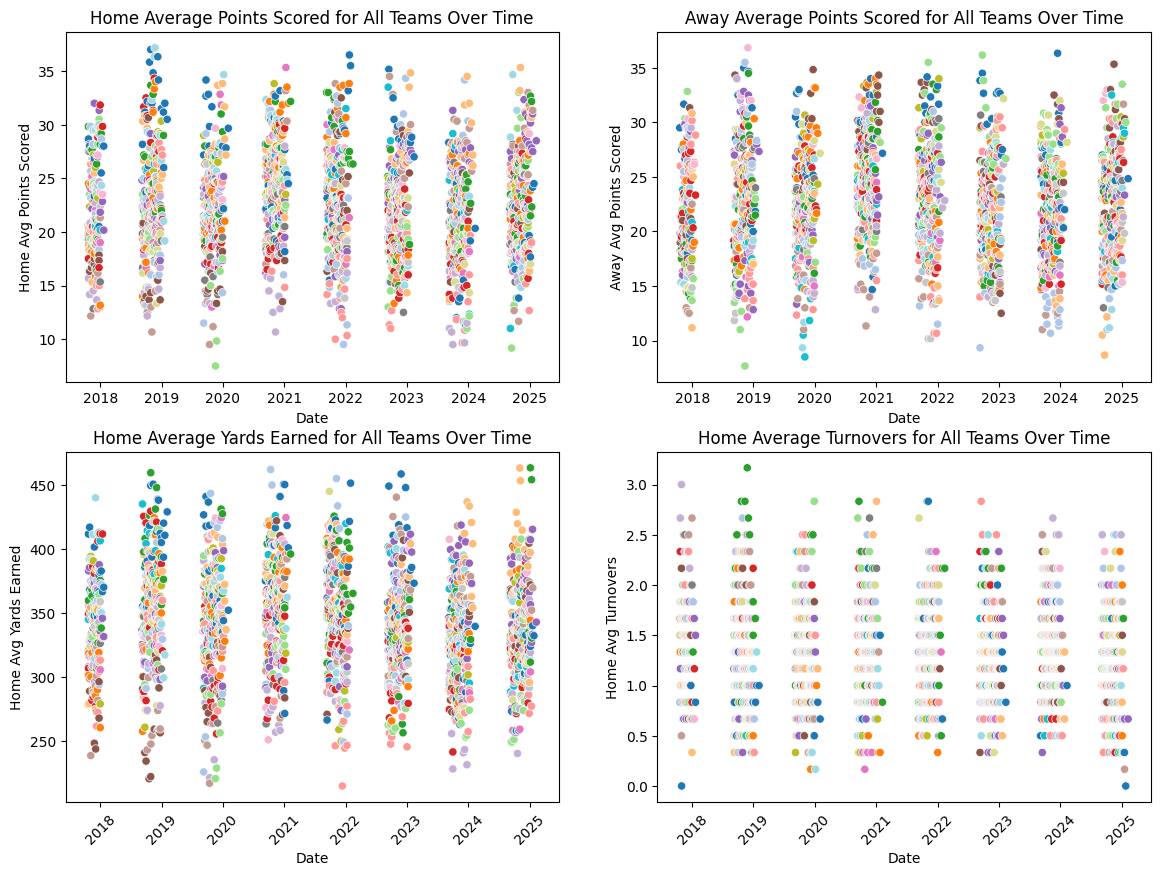

In [44]:
# Set up the figure size for all 4 plots
plt.figure(figsize=(14, 10))

# 1. Home Average Points Scored
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Date', y='Home_Avg_PointsScored', hue='HomeTeam', palette='tab20', legend=False)
plt.ylabel('Home Avg Points Scored')
plt.title('Home Average Points Scored for All Teams Over Time')

# 2. Away Average Points Scored
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Date', y='Away_Avg_PointsScored', hue='AwayTeam', palette='tab20', legend=False)
plt.ylabel('Away Avg Points Scored')
plt.title('Away Average Points Scored for All Teams Over Time')

# 3. Home Average Yards Earned
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Date', y='Home_Avg_YardsEarned', hue='HomeTeam', palette='tab20', legend=False)
plt.xlabel('Date')
plt.ylabel('Home Avg Yards Earned')
plt.title('Home Average Yards Earned for All Teams Over Time')
plt.xticks(rotation=45)

# 4. Home Average Turnovers
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Date', y='Home_Avg_Turnovers', hue='HomeTeam', palette='tab20', legend=False)
plt.xlabel('Date')
plt.ylabel('Home Avg Turnovers')
plt.title('Home Average Turnovers for All Teams Over Time')
plt.xticks(rotation=45)

# Show all the plots
plt.show()



In [45]:
# Drop NA values
df_cleaned = df.dropna()
df = df_cleaned.reset_index(drop=True)
df.shape

(2034, 36)

In [46]:
# List of columns to round
columns_to_round = [
    'Home_Avg_PointsScored', 'Home_Avg_YardsEarned', 'Home_Avg_Turnovers', 
    'Home_Avg_PointsAllowed', 'Home_Avg_YardsAllowed', 'Home_Avg_TurnoversForced', 
    'Home_WinRate', 'Away_Avg_PointsScored', 'Away_Avg_YardsEarned', 
    'Away_Avg_Turnovers', 'Away_Avg_PointsAllowed', 'Away_Avg_YardsAllowed', 
    'Away_Avg_TurnoversForced', 'Away_WinRate', 'Avg_TurnoversForced_Diff', 
    'Avg_YardsAllowed_Diff', 'Avg_PointsAllowed_Diff', 'Avg_Turnovers_Diff', 
    'Avg_Yards_Diff', 'Avg_Points_Diff', 'WinRate_Diff'
]

# Round the specified columns to 2 decimal places
df[columns_to_round] = df[columns_to_round].round(2)

# Check the updated DataFrame
print(df[columns_to_round].head())


   Home_Avg_PointsScored  Home_Avg_YardsEarned  Home_Avg_Turnovers  \
0                  20.67                278.33                1.17   
1                  20.33                356.00                1.00   
2                  29.83                359.83                1.83   
3                  17.50                306.83                2.33   
4                  19.83                301.17                1.50   

   Home_Avg_PointsAllowed  Home_Avg_YardsAllowed  Home_Avg_TurnoversForced  \
0                   21.00                 349.83                      0.83   
1                   17.17                 295.50                      1.33   
2                   23.00                 350.17                      1.67   
3                   24.67                 302.67                      1.00   
4                   32.50                 410.00                      1.33   

   Home_WinRate  Away_Avg_PointsScored  Away_Avg_YardsEarned  \
0          0.33                  29.50        

SuperBowls are Neurtal site games, our reshaping has assigned the winners of superbowls as the home team. This may lead to some skew/noise in our data, for now I will leave it in. In future for predicting SB games perhaps it ould be best to use awaygame data for both teams?

In [47]:
df[df['Week']=='SuperBowl']

,Date,Week,Day,Time,HomeTeam,AwayTeam,HomePoints,AwayPoints,HomeYards,AwayYards,...,Away_Avg_YardsAllowed,Away_Avg_TurnoversForced,Away_WinRate,WinRate_Diff,Avg_Points_Diff,Avg_Yards_Diff,Avg_Turnovers_Diff,Avg_PointsAllowed_Diff,Avg_YardsAllowed_Diff,Avg_TurnoversForced_Diff
413,2019-02-03,SuperBowl,Sun,6:30PM,New England Patriots,Los Angeles Rams,13,3,407,260,...,321.17,1.50,0.67,0.00,3.17,46.67,-0.50,-1.00,2.33,0.17
669,2020-02-02,SuperBowl,Sun,6:30PM,Kansas City Chiefs,San Francisco 49ers,31,20,397,351,...,303.50,1.33,0.67,0.33,2.50,12.67,-0.50,-9.17,-10.83,-0.17
928,2021-02-07,SuperBowl,Sun,6:30PM,Tampa Bay Buccaneers,Kansas City Chiefs,31,9,340,350,...,351.00,1.00,0.83,0.17,5.00,-3.50,-0.83,-2.00,5.50,0.67
1204,2022-02-13,SuperBowl,Sun,6:30PM,Los Angeles Rams,Cincinnati Bengals,23,20,313,305,...,365.83,1.67,0.83,0.00,3.50,45.83,1.83,0.50,-39.00,0.00
1481,2023-02-12,SuperBowl,Sun,6:30PM,Kansas City Chiefs,Philadelphia Eagles,38,35,340,417,...,275.83,1.17,0.67,0.33,0.33,6.33,-0.67,0.17,23.50,0.50
1757,2024-02-11,SuperBowl,Sun,6:30PM,Kansas City Chiefs,San Francisco 49ers,25,22,455,382,...,339.00,1.33,0.67,0.17,-7.83,-45.67,-0.17,-9.17,-40.83,-0.50
2033,2025-02-09,SuperBowl,Sun,6:30PM,Philadelphia Eagles,Kansas City Chiefs,40,22,345,275,...,351.17,0.83,1.00,-0.17,3.67,14.50,0.50,-0.83,-61.00,2.00


Save cleaned data nad subset to csvs

In [48]:
# Save subset and remaining df
# Convert 'Date' column to datetime if not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the date range
start_date = pd.to_datetime('2024-11-06')
end_date = pd.to_datetime('2025-02-28')

# Filter the DataFrame for games within the specified date range
subset2024 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Remove the games in that date range from the original DataFrame
GameData = df[~((df['Date'] >= start_date) & (df['Date'] <= end_date))]

# Save both DataFrames to separate CSV files
subset2024.to_csv('NFL_2024_Season_Subset.csv', index=False)
GameData.to_csv('NFL_Game_Data.csv', index=False)